<a href="https://colab.research.google.com/github/ihabiba/DataMining-OnlineLearning/blob/main/MBA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings("ignore")

## Step 1: Load & Inspect Dataset

In [2]:
# Import libraries
import pandas as pd

# Load dataset
df = pd.read_csv("personalized_learning_dataset.csv")

# Show dataset shape
print("Dataset shape:", df.shape)

print(df.dtypes)

# Display first 5 rows
df.head()

Dataset shape: (10000, 15)
Student_ID                    object
Age                            int64
Gender                        object
Education_Level               object
Course_Name                   object
Time_Spent_on_Videos           int64
Quiz_Attempts                  int64
Quiz_Scores                    int64
Forum_Participation            int64
Assignment_Completion_Rate     int64
Engagement_Level              object
Final_Exam_Score               int64
Learning_Style                object
Feedback_Score                 int64
Dropout_Likelihood            object
dtype: object


,Student_ID,Age,Gender,Education_Level,Course_Name,Time_Spent_on_Videos,Quiz_Attempts,Quiz_Scores,Forum_Participation,Assignment_Completion_Rate,Engagement_Level,Final_Exam_Score,Learning_Style,Feedback_Score,Dropout_Likelihood
0,S00001,15,Female,High School,Machine Learning,171,4,67,2,89,Medium,51,Visual,1,No
1,S00002,49,Male,Undergraduate,Python Basics,156,4,64,0,94,Medium,92,Reading/Writing,5,No
2,S00003,20,Female,Undergraduate,Python Basics,217,2,55,2,67,Medium,45,Reading/Writing,1,No
3,S00004,37,Female,Undergraduate,Data Science,489,1,65,43,60,High,59,Visual,4,No
4,S00005,34,Female,Postgraduate,Python Basics,496,3,59,34,88,Medium,93,Visual,3,No


## Step 2: Data Preprocessing (ETL)

In [3]:
# Check for missing values
print("Missing values per column:\n", df.isnull().sum())

# Drop Student_ID (not needed for MBA)
df = df.drop(columns=["Student_ID"])

# Example: Convert numerical features into categories (High/Medium/Low)
# We'll define bins for a few important attributes

def categorize(series, bins=3, labels=["Low", "Medium", "High"]):
    return pd.cut(series, bins=bins, labels=labels)

df['Video_Engagement_Level'] = categorize(df['Time_Spent_on_Videos'])
df['Quiz_Attempt_Level'] = categorize(df['Quiz_Attempts'])
df['Assignment_Completion_Level'] = categorize(df['Assignment_Completion_Rate'])
df['Quiz_Score_Level'] = categorize(df['Quiz_Scores'])
df['Final_Exam_Performance'] = categorize(df['Final_Exam_Score'])

# Preview transformed dataset
print(df.shape)
df.head()

Missing values per column:
 Student_ID                    0
Age                           0
Gender                        0
Education_Level               0
Course_Name                   0
Time_Spent_on_Videos          0
Quiz_Attempts                 0
Quiz_Scores                   0
Forum_Participation           0
Assignment_Completion_Rate    0
Engagement_Level              0
Final_Exam_Score              0
Learning_Style                0
Feedback_Score                0
Dropout_Likelihood            0
dtype: int64
(10000, 19)


,Age,Gender,Education_Level,Course_Name,Time_Spent_on_Videos,Quiz_Attempts,Quiz_Scores,Forum_Participation,Assignment_Completion_Rate,Engagement_Level,Final_Exam_Score,Learning_Style,Feedback_Score,Dropout_Likelihood,Video_Engagement_Level,Quiz_Attempt_Level,Assignment_Completion_Level,Quiz_Score_Level,Final_Exam_Performance
0,15,Female,High School,Machine Learning,171,4,67,2,89,Medium,51,Visual,1,No,Low,High,High,Medium,Low
1,49,Male,Undergraduate,Python Basics,156,4,64,0,94,Medium,92,Reading/Writing,5,No,Low,High,High,Medium,High
2,20,Female,Undergraduate,Python Basics,217,2,55,2,67,Medium,45,Reading/Writing,1,No,Medium,Low,Medium,Medium,Low
3,37,Female,Undergraduate,Data Science,489,1,65,43,60,High,59,Visual,4,No,High,Low,Medium,Medium,Medium
4,34,Female,Postgraduate,Python Basics,496,3,59,34,88,Medium,93,Visual,3,No,High,Medium,High,Medium,High


## Step 3: Basket Transformation

In [4]:
# Select features we want to include in MBA
mba_features = [
    'Education_Level', 'Course_Name',
    'Video_Engagement_Level', 'Quiz_Attempt_Level',
    'Assignment_Completion_Level', 'Quiz_Score_Level',
    'Final_Exam_Performance', 'Engagement_Level',
    'Learning_Style', 'Dropout_Likelihood'
]

# One-hot encode categorical features → binary basket matrix
basket = pd.get_dummies(df[mba_features])

# Preview basket format
print("Basket shape:", basket.shape)
basket.head()

Basket shape: (10000, 32)


,Education_Level_High School,Education_Level_Postgraduate,Education_Level_Undergraduate,Course_Name_Cybersecurity,Course_Name_Data Science,Course_Name_Machine Learning,Course_Name_Python Basics,Course_Name_Web Development,Video_Engagement_Level_Low,Video_Engagement_Level_Medium,...,Final_Exam_Performance_High,Engagement_Level_High,Engagement_Level_Low,Engagement_Level_Medium,Learning_Style_Auditory,Learning_Style_Kinesthetic,Learning_Style_Reading/Writing,Learning_Style_Visual,Dropout_Likelihood_No,Dropout_Likelihood_Yes
0,True,False,False,False,False,True,False,False,True,False,...,False,False,False,True,False,False,False,True,True,False
1,False,False,True,False,False,False,True,False,True,False,...,True,False,False,True,False,False,True,False,True,False
2,False,False,True,False,False,False,True,False,False,True,...,False,False,False,True,False,False,True,False,True,False
3,False,False,True,False,True,False,False,False,False,False,...,False,True,False,False,False,False,False,True,True,False
4,False,True,False,False,False,False,True,False,False,False,...,True,False,False,True,False,False,False,True,True,False


## Step 4: Generate Frequent Itemsets Using Apriori Algorithm

In [5]:
# Install mlxtend if not already installed
# !pip install mlxtend --quiet

from mlxtend.frequent_patterns import apriori, association_rules

basket = basket.astype(bool)

# Run Apriori to get frequent itemsets
frequent_itemsets = apriori(basket, min_support=0.05, use_colnames=True)  # support ≥ 5%

print("Frequent itemsets found:", frequent_itemsets.shape[0])

frequent_itemsets.head(100)

Frequent itemsets found: 1068


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


,support,itemsets
0,0.2923,(Education_Level_High School)
1,0.2007,(Education_Level_Postgraduate)
2,0.5070,(Education_Level_Undergraduate)
3,0.2026,(Course_Name_Cybersecurity)
4,0.1984,(Course_Name_Data Science)
...,...,...
95,0.1748,"(Quiz_Score_Level_Low, Education_Level_Undergr..."
96,0.1599,"(Quiz_Score_Level_Medium, Education_Level_Unde..."
97,0.1723,"(Quiz_Score_Level_High, Education_Level_Underg..."
98,0.1707,"(Education_Level_Undergraduate, Final_Exam_Per..."


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


## Step 4: Extract Association Rules

In [6]:
from mlxtend.frequent_patterns import association_rules

# Generate rules from frequent itemsets
rules = association_rules(
    frequent_itemsets,
    metric="confidence",  # can also try "lift"
    min_threshold=0.6     # only keep rules with confidence >= 60%
)

# to see how many rules are generated
print("Total rules generated:", rules.shape[0])

# Sort rules by lift (strongest associations at the top)
rules = rules.sort_values(by="lift", ascending=False).reset_index(drop=True)

# Show first 10 rules
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10)

Total rules generated: 407


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

,antecedents,consequents,support,confidence,lift
0,"(Assignment_Completion_Level_Low, Engagement_L...",(Dropout_Likelihood_No),0.0582,0.841040,1.045680
1,"(Engagement_Level_Low, Final_Exam_Performance_...",(Dropout_Likelihood_No),0.0601,0.833564,1.036385
2,"(Course_Name_Web Development, Assignment_Compl...",(Dropout_Likelihood_No),0.0563,0.832840,1.035485
3,"(Assignment_Completion_Level_Low, Video_Engage...",(Dropout_Likelihood_No),0.0942,0.829956,1.031898
4,"(Course_Name_Cybersecurity, Final_Exam_Perform...",(Dropout_Likelihood_No),0.0561,0.829882,1.031806
5,"(Final_Exam_Performance_Medium, Course_Name_We...",(Dropout_Likelihood_No),0.0530,0.829421,1.031233
6,"(Education_Level_Postgraduate, Quiz_Score_Leve...",(Dropout_Likelihood_No),0.0552,0.828829,1.030497
7,"(Quiz_Attempt_Level_Low, Course_Name_Web Devel...",(Dropout_Likelihood_No),0.0811,0.828396,1.029959
8,"(Quiz_Score_Level_Medium, Course_Name_Web Deve...",(Dropout_Likelihood_No),0.0502,0.828383,1.029943
9,"(Quiz_Attempt_Level_Low, Engagement_Level_Low)",(Dropout_Likelihood_No),0.0866,0.827916,1.029362


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


## Step 5: Visualize Association Rules

#### 1. Scatterplot (Lift vs Confidence, bubble size = Support)

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

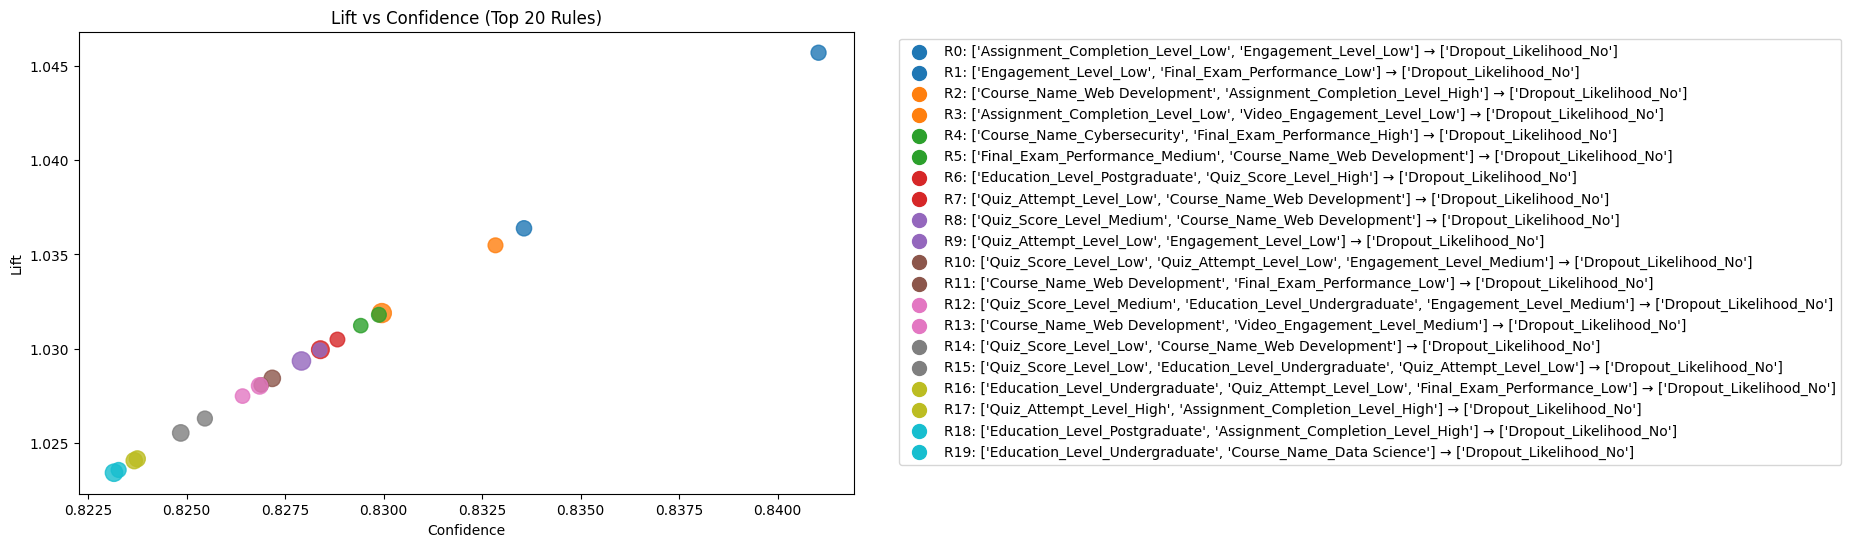

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [7]:
import matplotlib.pyplot as plt
import os

# Select Top 20 rules by lift
top_rules = rules.sort_values(by="lift", ascending=False).head(20).reset_index()

plt.figure(figsize=(10,6))

# Scatter plot with color-coded rules
scatter = plt.scatter(top_rules['confidence'], top_rules['lift'],
                      s=top_rules['support']*2000,
                      c=range(len(top_rules)), cmap='tab10', alpha=0.8)

# Add legend with Rule IDs
for i, row in top_rules.iterrows():
    plt.scatter([], [], c=scatter.cmap(scatter.norm(i)),
                s=100, label=f"R{i}: {list(row['antecedents'])} → {list(row['consequents'])}")

plt.title('Lift vs Confidence (Top 20 Rules)')
plt.xlabel('Confidence')
plt.ylabel('Lift')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Save the plot to the assets directory
plt.savefig(os.path.join('assets', 'lift_vs_confidence_scatterplot.png'))

plt.show()

#### 2. Heatmap of Item Co-occurrence

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Get top 20 items from frequent itemsets
top_items = frequent_itemsets.sort_values(by='support', ascending=False).head(20)

# Create co-occurrence matrix
from itertools import combinations
import numpy as np
import pandas as pd

items = list(top_items['itemsets'])
co_matrix = pd.DataFrame(0, index=range(len(items)), columns=range(len(items)))

for i, itemset in enumerate(items):
    for j, other in enumerate(items):
        if i != j:
            count = 0
            for row in basket.index:
                if all(x in basket.columns[basket.loc[row]].tolist() for x in itemset) and \
                   all(x in basket.columns[basket.loc[row]].tolist() for x in other):
                    count += 1
            co_matrix.iloc[i, j] = count

sns.heatmap(co_matrix, xticklabels=[str(x) for x in items],
            yticklabels=[str(x) for x in items], cmap="YlGnBu")
plt.title("Item Co-occurrence Heatmap (Top 20)")

# Save the plot to the assets directory
plt.savefig(os.path.join('assets', 'item_cooccurrence_heatmap.png'))


plt.show()

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replac

In [8]:
import os

assets_dir = 'assets'

if not os.path.exists(assets_dir):
    os.makedirs(assets_dir)
    print(f"Directory '{assets_dir}' created successfully.")
else:
    print(f"Directory '{assets_dir}' already exists.")

Directory 'assets' already exists.


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [9]:
import os

assets_dir = 'assets'

# Check if the assets directory exists before zipping
if os.path.exists(assets_dir):
    zip_command = f"zip -r {assets_dir}.zip {assets_dir}"
    print(f"Executing: {zip_command}")
    os.system(zip_command)
    print(f"Folder '{assets_dir}' has been zipped to '{assets_dir}.zip'.")
else:
    print(f"Directory '{assets_dir}' does not exist. No folder to zip.")

Executing: zip -r assets.zip assets
Folder 'assets' has been zipped to 'assets.zip'.


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag